<a href="https://colab.research.google.com/github/Sayamdeepa/Zomato-Restaurant-Data-Analysis/blob/main/Zomato_restaurant_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset can be downloaded from Kaggle. I have build this project on google Colab. The dataset can be downloaded as follows

In [1]:
from google.colab import files
files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/shrutimehta/zomato-restaurants-data'
od.download(dataset_url)

Saving zomato.csv to zomato (1).csv
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sayamdeepa
Your Kaggle Key: ··········


100%|██████████| 5.47M/5.47M [00:00<00:00, 107MB/s]

Reading the data using Pandas

In [7]:
import pandas as pd

df = pd.read_csv('/content/zomato (1).csv', engine='python',encoding="ISO-8859-1")

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Checking if dataset contains any null

In [8]:
## Checking if dataset contains any null

nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Cuisines']


Cuisines seem to contain null values. Hence any further analysis involving Cuisines the NaN values has to be considered.

There is another file that is also available along with this dataset

In [9]:
df1 = pd.read_excel('/content/Country-Code.xlsx')
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


Let us merge both datasets. This will help us to understand the dataset country-wise.

In [10]:
df2 = pd.merge(df,df1,on='Country Code',how='left')
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


# Exploratory Analysis and Visualization
Before we ask questions on the dataset, it would be helpful to understand the restaurant's geographical spread, understanding the rating, Currency, Online Delivery, City coverage…etc.

# List of countries the survey is spread across

In [11]:
print('List of counteris the survey is spread accross - ')
for x in pd.unique(df2.Country): print(x)
print()
print('Total number to country', len(pd.unique(df2.Country)))

List of counteris the survey is spread accross - 
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey

Total number to country 15


The survey seems to have spread across15 countries. This shows that Zomato is a multinational company having actives business in all those countries.



In [12]:
from plotly.offline import init_notebook_mode, plot, iplot

labels = list(df2.Country.value_counts().index)
values = list(df2.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

As Zomato is a startup from India hence it makes sense that it has maximum business spread across restaurants in India

# Understanding the Rating aggregate, color, and text

In [13]:
df3 = df2.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df3
df3

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


The above information helps us to understand the relation between Aggregate rating, color, and text. We conclude the following color assigned to the ratings:

Rating 0 — White — Not rated


Rating 1.8 to 2.4 — Red — Poor


Rating 2.5 to 3.4 — Orange — Average

Rating 3.5 to 3.9 — Yellow — Good

Rating 4.0 to 4.4 — Green — Very Good

Rating 4.5 to 4.9 — Dark Green — Excellent




Let us try to understand the spread of rating across restaurants

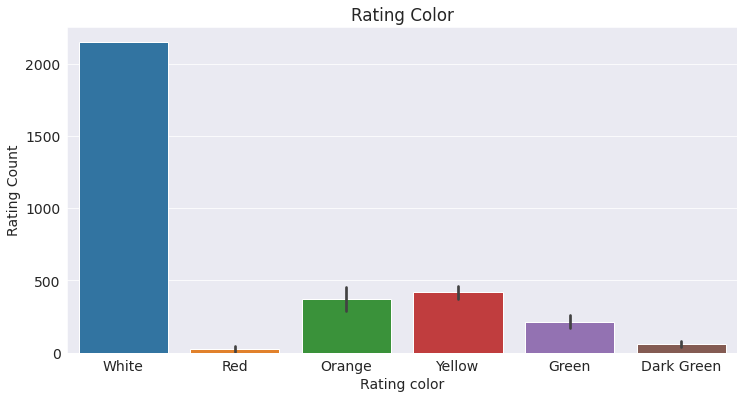

In [14]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
# plt.xticks(rotation=75)
plt.title('Rating Color')
sns.barplot(x=df3['Rating color'], y=df3['Rating Count']);

Interesting, Maximum restaurants seems to have gone No ratings. Let us check if these restaurants belong to some specific country.

In [15]:
No_rating = df2[df2['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


India seems to have maximum unrated restaurants. In India the culture of ordering online food is still gaining momentum hence most of the restaurants are still unrated on Zomato as people might be preferring to visiting the restaurant for a meal.

In [16]:
country_currency = df2[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


Above table display country and the currency they accept. Interestingly four countries seems to be accepting currency in dollars.

# Online delivery distribution

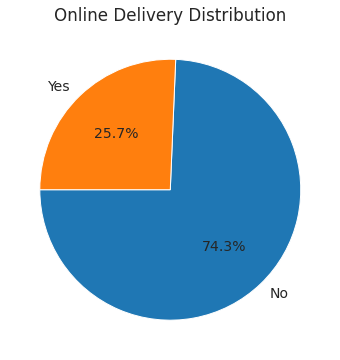

In [17]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df2['Has Online delivery'].value_counts()/9551*100, labels=df2['Has Online delivery'].value_counts().index, autopct='%1.1f%%', startangle=180);

Only 25% of restaurants accept online delivery. This data might be biased as we have the maximum number of restaurants listed here are from India. Maybe analysis over city-wise would be more helpful.

# Let us try to understand the coverage of the city


In [19]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
plt.figure(figsize=(12,6))
# import plotly.plotly as py

labels = list(df2.City.value_counts().head(20).index)
values = list(df2.City.value_counts().head(20).values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence Citywise",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Cities",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig);

<Figure size 864x432 with 0 Axes>

The data seems to be skewed towards New Delhi, Gurgaon, and Noida. I see minimal data for other cities. Hence I would do my analysis predominantly on New Delhi.

# Asking and Answering Questions
We’ve already gained several insights about the restaurants present in the survey. Let’s ask some specific questions and try to answer them using data frame operations and visualizations.

# Q1: From which Locality maximum hotels are listed in Zomato

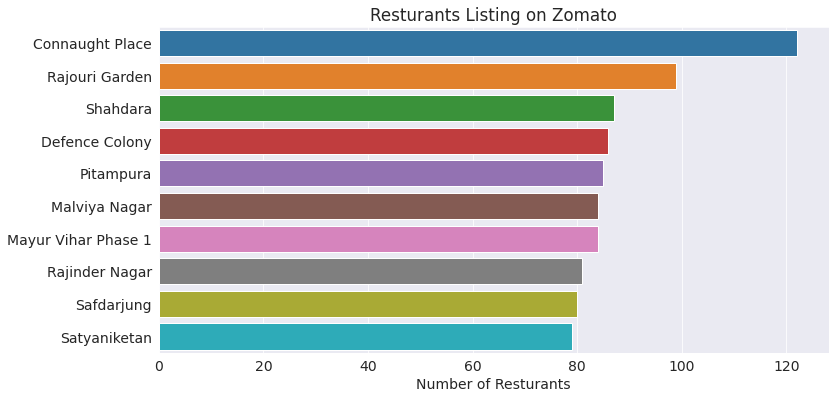

In [21]:
Delhi = df2[(df2.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index)

plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato');

Connaught place seems to have a high no of restaurants registered with Zomato, Let us understand the cuisines the top-rated restaurants have to offer



# Q2: What kind of Cuisine do these highly-rated restaurants offer

In [25]:
# I achieve this by the following steps

## Fetching the resturants having 'Excellent' and 'Very Good' rating
ConnaughtPlace = Delhi[(Delhi.Locality.isin(['Connaught Place'])) & (Delhi['Rating text'].isin(['Excellent','Very Good']))]

ConnaughtPlace = ConnaughtPlace.Cuisines.value_counts().reset_index()

## Extracing all the cuisens in a single list
cuisine = []
for x in ConnaughtPlace['index']: 
  cuisine.append(x)

# cuisine = '[%s]'%', '.join(map(str, cuisien))
cuisine

['North Indian, Chinese, Italian, Continental',
 'Continental, Italian, Asian, Indian',
 'Continental, Mediterranean, Italian, North Indian',
 'Bakery, Desserts, Fast Food',
 'North Indian, Continental',
 'North Indian, European, Asian, Mediterranean',
 'Continental, North Indian, Italian, Asian',
 'North Indian, Afghani, Mughlai',
 'North Indian, European',
 'Cafe',
 'Continental, Mexican, Burger, American, Pizza, Tex-Mex',
 'South Indian',
 'Asian, North Indian',
 'Italian, Mexican, Continental, North Indian, Finger Food',
 'Continental, American, Asian, North Indian',
 'Fast Food, American, Burger',
 'North Indian, Mediterranean, Asian, Fast Food',
 'Ice Cream',
 'Healthy Food, Continental, Italian',
 'Japanese',
 'Modern Indian',
 'Chinese',
 'Continental, North Indian, Chinese, Mediterranean',
 'North Indian, Chinese, Italian, American, Middle Eastern',
 'Biryani, Hyderabadi',
 'Biryani, North Indian, Hyderabadi',
 'North Indian, Chinese',
 'North Indian, Chinese, Continental, Ita

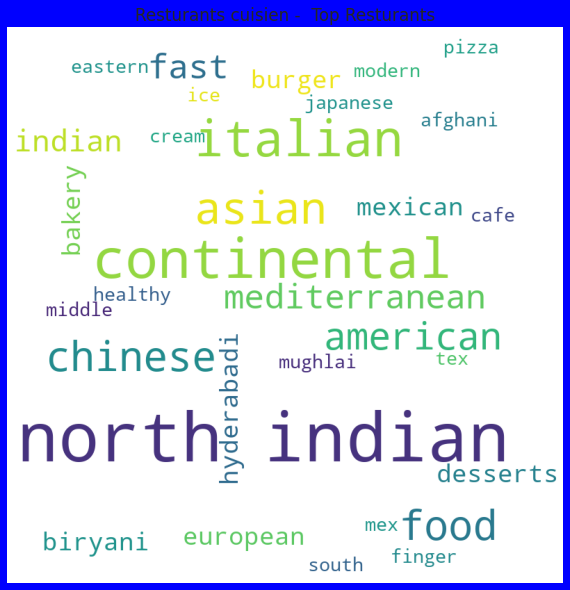

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in cuisine:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = 'b', edgecolor='g')
plt.title('Resturants cuisien -  Top Resturants')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Top-rated restaurants seem to be doing well in the following cuisine

North Indian

Chinese

Italian

American

# Q3: How many of such restaurants accept online delivery

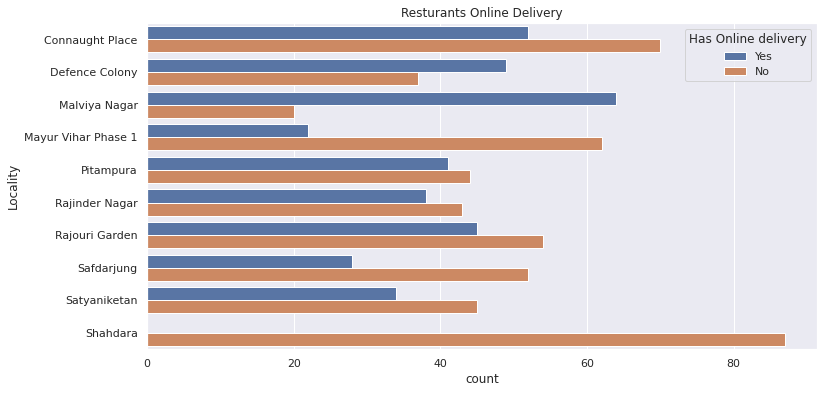

In [27]:
top_locality = Delhi.Locality.value_counts().head(10)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery');

Apart from Shahdara locality, restaurants in other localities accept online delivery.

Online Delivery seems to be on the higher side in Defence colony and Malviya Nagar

# Q4: Understanding the Restaurants Rating localities.

Apart from Malviya Nagar, Defence colony in rest of the locality people seems to prefer visiting the restaurants rather ordering food online.

I would now like to understand the rating of these restaurants that are providing online delivery in Malviya Nagar, Defence colony.

Defence colony seems to have high no of highly rated restaurants but Malviya Nagar seems to done better in terms of Good and Average restaurants.

As restaurants with ‘Poor’ and ‘Not Rated’ is far lesser that ‘Good’, ‘Very Good’ and ‘Excellent’ restaurants. Hence people in these localities prefer online ordering

# Q5: Rating VS Cost of dinning

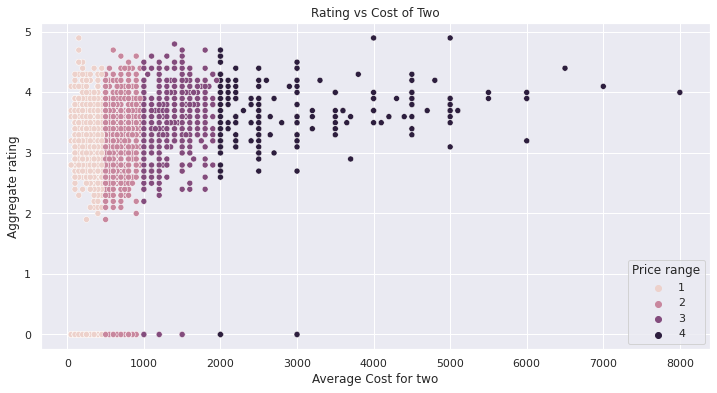

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two');

I observe there is no linear relation between price and rating. For instance, Restaurants with good rating (like 4–5) have restaurants with all the price range and spread across the entire X axis

# Inferences and Conclusions
We’ve drawn many inferences from the survey. Here’s a summary of a few of them:

The dataset is skewed towards India and doesn't represent the complete data of restaurants worldwide.
Restaurants rating is categorized in six categories

Not Rated

Average

Good

Very Good

Excellent

Connaught Palace has maximum restaurants listed on Zomato but in terms of online delivery acceptance Defence colony and Malviya Nagar seems to be doing better.

The top-rated restaurants seem to be getting a better rating on the following cuisine
North Indian

Chinese

American

Italian

There is no relation between cost and rating. Some of the best-rated restaurants are low on cost and vice versa.